# Table of Contents
* [Linear Regression](#linear-regression)
* [kNN Regression](#knn-regression)
* [Logistic Regression](#logistic-regression)
* [kNN Classification](#knn-classification)
* [Decision Tree Classification](#decision-tree-classification)
* [Decision Tree Classification with Pruning](#decision-tree-classification-pruning)
* [Grid Search](#grid-search)
* [k-means Clustering](#k-means-clustering)
* [Dimensionality Reduction](#dimensionality-reduction)
* [Save and Load Model](#save-load-model)

In [1]:
# Initialization
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

## Linear Regression <a class="anchor" id="linear-regression"></a>

In [2]:
# Linear Regression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print(f'R2 score: {lr.score(X_test, y_test):.2f}')

R2 score: 0.68


## kNN Regression <a class="anchor" id="knn-regression"></a>

In [3]:
# kNN Regression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsRegressor
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
knn = KNeighborsRegressor().fit(X_train, y_train)
print(f'R2 score: {knn.score(X_test, y_test):.2f}')

R2 score: 0.64


## Logistic Regression <a class="anchor" id="logistic-regression"></a>

In [4]:
# Logistic Regression
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('pima-indians-diabetes.data.csv', names=names)
array = df.values
X = array[:,:-1]
y = array[:,-1]
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
lgr = LogisticRegression().fit(X_train, y_train)
print(f'Accuracy: {lgr.score(X_test, y_test):.2%}')

Accuracy: 72.92%


## kNN Classification <a class="anchor" id="knn-classification"></a>

In [5]:
# kNN Classification
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('pima-indians-diabetes.data.csv', names=names)
array = df.values
X = array[:,:-1]
y = array[:,-1]
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
knn = KNeighborsClassifier().fit(X_train, y_train)
print(f'Accuracy: {knn.score(X_test, y_test):.2%}')

Accuracy: 65.62%


## Decision Tree Classification <a class="anchor" id="decision-tree-classification"></a>

In [6]:
# Decision Tree Classification
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.tree import DecisionTreeClassifier
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('pima-indians-diabetes.data.csv', names=names)
array = df.values
X = array[:,:-1]
y = array[:,-1]
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
dtc = DecisionTreeClassifier().fit(X_train, y_train)
print(f'Train accuracy: {dtc.score(X_train, y_train):.2%}')
print(f'Test accuracy: {dtc.score(X_test, y_test):.2%}')

Train accuracy: 100.00%
Test accuracy: 68.75%


## Decision Tree Classification with Pruning<a class="anchor" id="decision-tree-classification-pruning"></a>

Train accuracy: 81.25%
Test accuracy: 75.00%


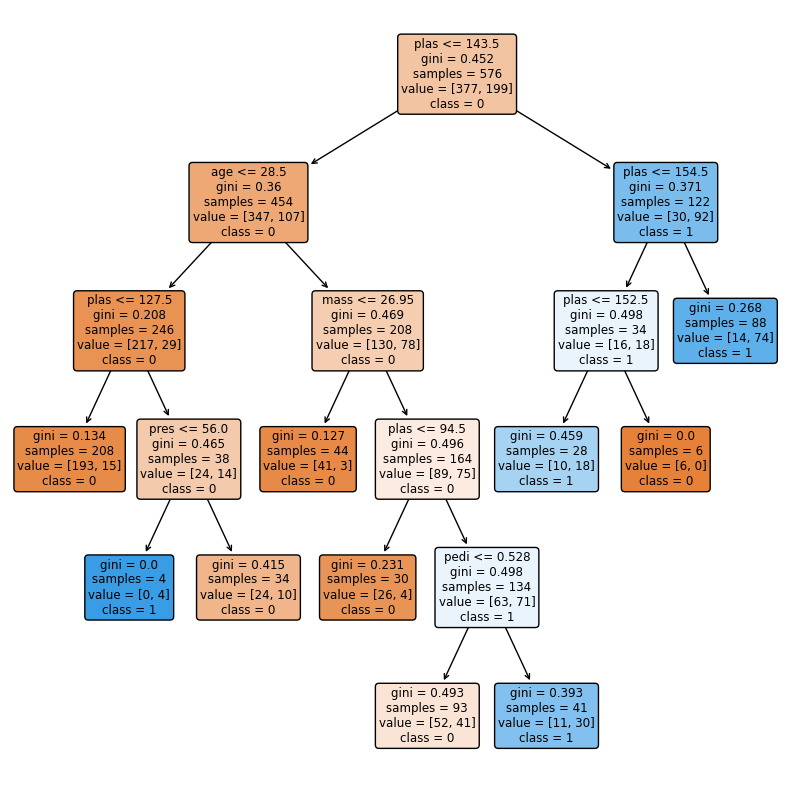

In [7]:
# Decision Tree Classification with pre-pruning
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('pima-indians-diabetes.data.csv', names=names)
array = df.values
X = array[:,:-1]
y = array[:,-1]
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
dtc = DecisionTreeClassifier(max_leaf_nodes=10).fit(X_train, y_train)
print(f'Train accuracy: {dtc.score(X_train, y_train):.2%}')
print(f'Test accuracy: {dtc.score(X_test, y_test):.2%}')

plt.figure(figsize=(10, 10))
plot_tree(dtc, feature_names=names, class_names=['0', '1'], rounded=True, filled=True)
plt.show()

## Grid Search <a class="anchor" id="grid-search"></a>

In [8]:
# Hyperparameter tuning with grid search
from pandas import read_csv
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split as split, KFold
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('pima-indians-diabetes.data.csv', names=names)
X = df.values[:, :-1]
y = df.values[:, -1]
X_train, X_test, y_train, y_test = split(X, y, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
print(f'Accuracy without tuning: {model.score(X_test, y_test):.2%}')

kf = KFold(n_splits=5, shuffle=True, random_state=42)
params = dict(criterion=['gini', 'entropy'], max_leaf_nodes=range(2, 21))
grid = GridSearchCV(model, params, cv=kf, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)
print(grid.best_params_)

model.set_params(**grid.best_params_).fit(X_train, y_train)
print(f'Accuracy with tuning: {model.score(X_test, y_test):.2%}')

Accuracy without tuning: 70.83%
Fitting 5 folds for each of 38 candidates, totalling 190 fits
{'criterion': 'gini', 'max_leaf_nodes': 7}
Accuracy with tuning: 74.48%


## k-means Clustering <a class="anchor" id="k-means-clustering"></a>

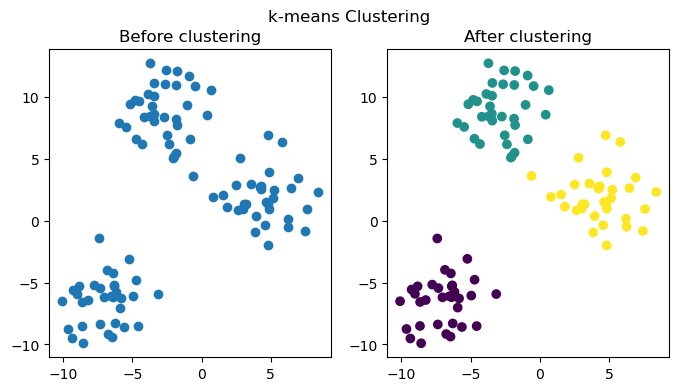

In [9]:
# k-means clustering
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(centers=3, cluster_std=2, random_state=42)
km = KMeans(n_clusters=3).fit(X)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('k-means Clustering')
ax1.scatter(X[:, 0], X[:, 1])
ax1.set_title('Before clustering')
ax2.scatter(X[:, 0], X[:, 1], c=km.labels_)
ax2.set_title('After clustering')
plt.show()

## Dimensionality Reduction <a class="anchor" id="dimensionality-reduction"></a>

In [10]:
# Dimensionality Reduction with PCA
from pandas import read_csv
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as split
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('pima-indians-diabetes.data.csv', names=names)
X = df.values[:, :-1]
y = df.values[:, -1]
X_train, X_test, y_train, y_test = split(X, y, random_state=42)
pca = PCA(n_components=3)
Xr_train = pca.fit_transform(X_train)
Xr_test = pca.transform(X_test)
knn1 = KNeighborsClassifier().fit(X_train, y_train)
knn2 = KNeighborsClassifier().fit(Xr_train, y_train)
# Evaluate performance
print(f"knn1 score: {knn1.score(X_test, y_test):.3%}")
print(f"knn2 score: {knn2.score(Xr_test, y_test):.3%}")

knn1 score: 65.625%
knn2 score: 68.229%


## Save and Load Model <a class="anchor" id="save-load-model"></a>

In [11]:
# Save and load model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as split
from pandas import read_csv
from joblib import dump, load

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('pima-indians-diabetes.data.csv', names=names)
array = df.values
X = array[:, :-1]
y = array[:, -1]
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=42)

model = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
print(f'model accuracy: {model.score(X_test, y_test):.2%}')

dump(model, 'mymodel.job')  # serialize model to file
my_model = load('mymodel.job') # deserialize model from file
print(f'my_model accuracy: {my_model.score(X_test, y_test):.2%}')

model accuracy: 67.53%
my_model accuracy: 67.53%
